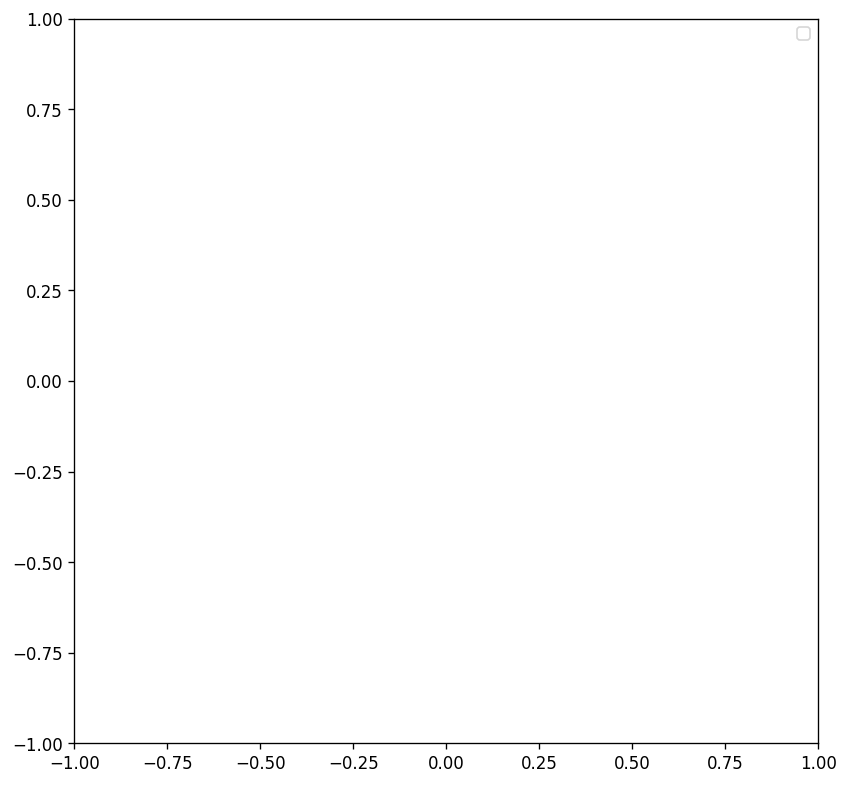

In [4]:
import numpy as np
import matplotlib
#matplotlib.use("TkAgg") # set the backend (to move the windows to desired location on screen)
import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
from matplotlib.pyplot import *
 
fig = figure(figsize=(8, 8), dpi=120)
 
 
# Input parameters
nTrials = int(1E4)
radius = 1
#-------------
# Counter for the pins inside the circle
nInside = 0
# Counter for the pins dropped
nDrops = 0
 
# Generate points in a square of side 2 units, from -1 to 1.
XrandCoords = np.random.default_rng().uniform(-1, 1, (nTrials,))
YrandCoords = np.random.default_rng().uniform(-1, 1, (nTrials,))
 
# First matplotlib window
fig1 = plt.figure(1)
#plt.get_current_fig_manager().window.wm_geometry("+00+00") # move the window
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend()
 


In [5]:
# Second matplotlib window
plt.figure(2)
#plt.get_current_fig_manager().window.wm_geometry("+960+00") # move the window
# plt.ylim(2.8,4.3)
 
# Some checks so the legend labels are only drawn once
isFirst1 = True
isFirst2 = True
 
# Some arrays to store the pi value vs the number of pins dropped
piValueI = []
nDrops_arr = []
 
# Some arrays to plot the points
insideX = []
outsideX = []
insideY = []
outsideY = []
 
# Begin Monte Carlo
for i in range(nTrials):
    x = XrandCoords[i]
    y = YrandCoords[i]
    # Increment the counter for number of total pins dropped
    nDrops = nDrops + 1
     
     
    # Check if the points are inside the circle or not
    if x**2+y**2<=radius**2:
        nInside = nInside + 1
        insideX.append(x)
        insideY.append(y)
                
    else:
        outsideX.append(x)
        outsideY.append(y)
         
 
    # plot only at some values
    if i%100==0:
        # Draw on first window
        plt.figure(1)
        # The label is only needed once so 
        if isFirst1:
             
            # Plot once with label
            plt.scatter(insideX,insideY,c='pink',s=50,label='Drop inside')
            isFirst1 = False
            plt.legend(loc=(0.75, 0.9))
        else:
            #Remaining plot without label
           plt.scatter(insideX,insideY,c='pink',s=50)
        # Draw on first window
        plt.figure(1)
        # The label is only needed once so 
        if isFirst2:
            # Plot once with label
            plt.scatter(outsideX,outsideY,c='orange',s=50,label='Drop outside')
            isFirst2 = False
            plt.legend(loc=(0.75, 0.9))
        else:
            #Remaining plot without label
           plt.scatter(outsideX,outsideY,c='orange',s=50)
         
          
        area = 4*nInside/nDrops
        plt.figure(1)
        plt.title('No. of pin drops = '+str(nDrops)+';         No. inside circle = '+str(nInside)+r';         π  ≈ $4\frac{N_\mathrm{inside}}{N_\mathrm{total}}=$ '+str(np.round(area,6)))
        piValueI.append(area)
        nDrops_arr.append(nDrops)
        # For plotting on the second window
        plt.figure(2)
        plt.axhline(y=np.pi, c='darkseagreen',linewidth=2,alpha=0.5)
        plt.plot(nDrops_arr,piValueI,c='mediumorchid')
        plt.title('π estimate vs no. of pin drops')
        plt.annotate('π',[0,np.pi],fontsize=20)
        # The following command is needed to make the second window plot work.
        plt.draw()
        # Pause for animation
        plt.pause(0.1)
             
     
area = 4*nInside/nTrials
print("Final estimated value of Pi: ",area)
 
 
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Most Recent one

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
    
from numpy.random import random
from numpy import pi

import os
#print(os.listdir("../input"))

In [8]:
def MonteCarloPi(maxIterations):
#Draw a square and a circle to frame out simulation
    squareX = [1,-1,-1,1,1]
    squareY = [1,1,-1,-1,1]
    circleX,circleY = [],[]
    
    for i in range(361):
        circleX.append(np.cos(np.pi*i/180))
        circleY.append(np.sin(np.pi*i/180))

#Start keeping track of values we're interested in
    insideX,insideY,outsideX,outsideY,Iteration,CurrentPi = [],[],[],[],[],[]
    insideCounter = 0

#Generate a bunch of values of x and y between -1 and 1, then assess their combined radius on an xy plane
    for i in range(maxIterations):
        x = 2*(random()-0.5)
        y = 2*(random()-0.5)
        r = np.sqrt(x**2+y**2)
        Iteration.append(i)
        if r <= 1:
            insideCounter +=1
            insideX.append(x)
            insideY.append(y)
        else:
            outsideX.append(x)
            outsideY.append(y)
        CurrentPi.append(4*insideCounter/(i+1))

    piValue = 4*insideCounter / maxIterations
    piError = round(100*((piValue-pi)/pi),4)

#Draw a 2D plot of where our iterations landed compared to the square and circle
    rcParams['figure.figsize'] = 5, 5
    plt.plot(squareX,squareY,color='#000000')
    plt.plot(circleX,circleY,color='#0000CC')
    plt.scatter(insideX,insideY,color='#00CC00',marker=".")
    plt.scatter(outsideX,outsideY,color='#CC0000',marker=".")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
#Draw a psuedo-time series plot of current estimate of pi vs. iteration number
    plt.plot(Iteration,CurrentPi,color='#009900')
    plt.axhline(y=pi,color='#0F0F0F',ls='--')
    plt.axis([0,maxIterations,0,4.1])
    plt.xlabel('Iteration Number')
    plt.ylabel('Estimate for pi')
    plt.show()

#print out our final estimate and how it compares to the true value
    print('\n' + f'Pi is approximately {piValue}\n')
    print(f'This is {piError}% off the true value.\n')

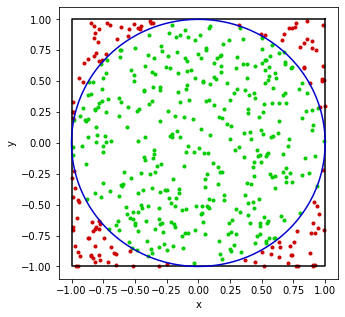

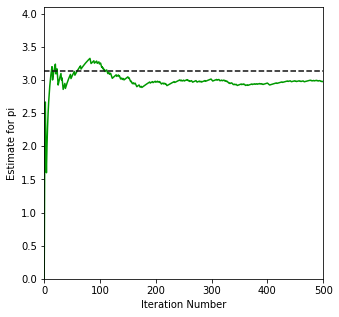


Pi is approximately 2.976

This is -5.271% off the true value.



In [9]:
MonteCarloPi(500)

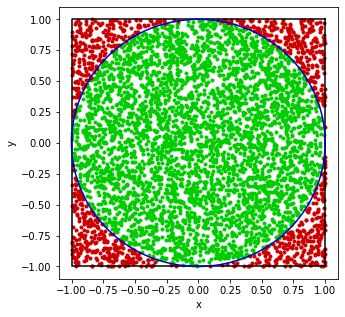

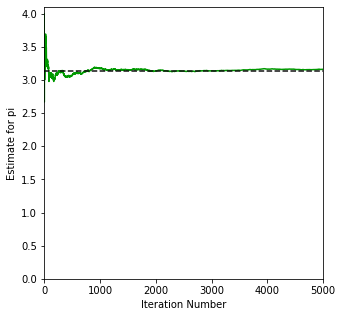


Pi is approximately 3.16

This is 0.5859% off the true value.



In [10]:
MonteCarloPi(5000)

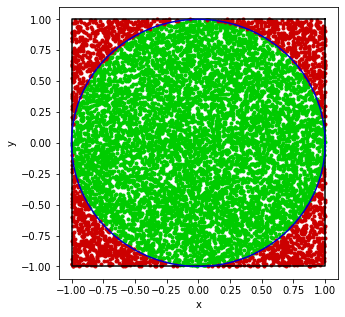

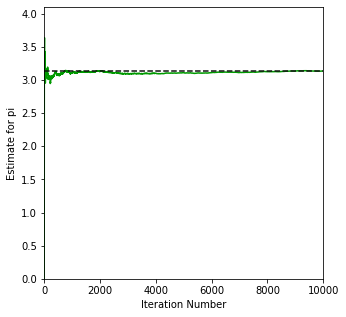


Pi is approximately 3.134

This is -0.2417% off the true value.



In [11]:
MonteCarloPi(10000)

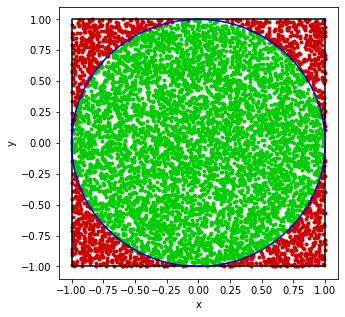

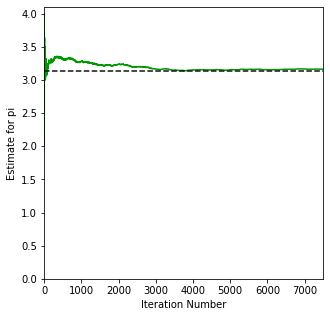


Pi is approximately 3.1616

This is 0.6369% off the true value.



In [12]:
MonteCarloPi(7500)

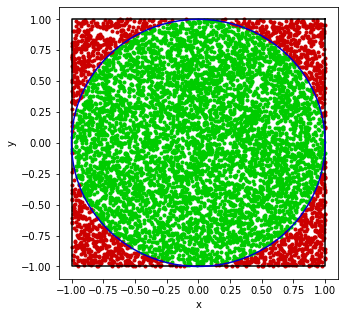

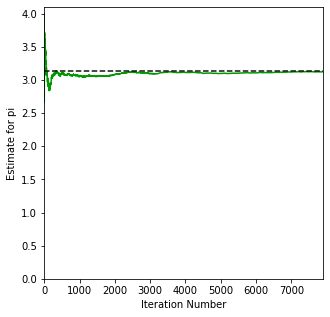


Pi is approximately 3.1235443037974684

This is -0.5745% off the true value.



In [15]:
MonteCarloPi(7900)